# Task 1
![sh1.png](sh1.png)

In [73]:
import numpy as np
import time
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd

n = 2000
rank = 2 #retain only the top two singular values and corresponding singular vectors

#with iid elements sampled from standart normal distribution)
A = np.random.normal(0, 1, size=(n, n))
print(A)
# Using numpy.linalg.svd
start_time = time.time()
U, S, VT = np.linalg.svd(A, full_matrices=False)
Asvd = U[:, :rank] @ np.diag(S[:rank]) @ VT[:rank, :]
numpy_time = time.time() - start_time

# Using scipy.sparse.linalg.svds
start_time = time.time()
U2, S2, VT2 = svds(A, k=rank)
Asvds = U2 @ np.diag(S2) @ VT2
scipy_time = time.time() - start_time

# Using sklearn.utils.extmath.randomized_svd
start_time = time.time()
U3, S3, VT3 = randomized_svd(A, n_components=rank, n_iter = 50)#5)
Arsvd = U3 @ np.diag(S3) @ VT3
rsvd_time = time.time() - start_time

print("Numpy_time:", numpy_time, "s")
print("Scipy_time:", scipy_time, "s")
print("Sklearn_time:", rsvd_time,"s")

# Calculate the error norms for each approximation
error_norm_svd = np.linalg.norm(A - Asvd, 'fro')
error_norm_svds = np.linalg.norm(A - Asvds, 'fro')
error_norm_rsvd = np.linalg.norm(A - Arsvd, 'fro')
print("\n")
print("Asvd:", error_norm_svd)
print("Asvds:", error_norm_svds)
print("Arsvd:", error_norm_rsvd)

[[ 0.0323027   0.27725253 -1.48523787 ... -1.20304212 -1.17771494
   1.35326557]
 [-0.33591635 -0.12202412  0.47038698 ... -0.83673732  0.34706643
  -0.82731643]
 [-0.35547027 -0.80518272 -0.3865034  ... -1.37973578  0.55829342
  -0.17433615]
 ...
 [-0.69739077 -0.17512498  0.74644399 ...  1.81791202 -0.36882878
  -0.69356695]
 [-0.94183139 -1.34734955  0.41510781 ... -0.0313533  -0.66781036
   0.5670765 ]
 [ 0.45482072 -0.38195813 -1.08053875 ...  0.71638211  0.19070464
   0.82174989]]
Numpy_time: 10.654074907302856 s
Scipy_time: 2.6573715209960938 s
Sklearn_time: 1.3215339183807373 s


Asvd: 1997.3663240782926
Asvds: 1997.3663240782928
Arsvd: 1997.3680920182524


A lower Frobenius norm indicates a better approximation, meaning the rank-2 approximation is closer to the original matrix. The errors for Asvd and Asvds are almost the same. The error for Arsvd is slightly higher, ==>  Arsvd may not be good in approximating the original matrix A.

However, if the matrix is dense (i.e., most elements are non-zero) ==> better to use numpy.linalg.svd for performing SVD. If the matrix is sparse (i.e., it has a significant number of zero elements) ==> scipy.sparse.linalg.svds (memory-efficient). 

sklearn.utils.extmath: it is good for large dataset. It allows you to approximate the top singular values and vectors of a matrix without computing the entire SVD. I can use n_iter more if I want more accurate approximation of the top singular values and vectors with randomized SVD. However, it will also increase the time and computational resources required to perform the computation.

Немного комментариев:
![Jupyter Notebook Logo](sh7.png)

==> Норма Фробениуса разности между исходной матрицей и аппроксимацией измеряет "ошибку" аппроксимации. Эта ошибка представляет собой расстояние между матрицей A и её аппроксимацией в пространстве всех матриц.Следовательно, меньшая норма Фробениуса указывает на то, что ошибка аппроксимации меньше, и аппроксимация более точно отражает исходные данные. 

# Task 2
![image.png](sh2.png)

![image.png](t2.png)
![image.png](t22.png)

# Task 3
![image.png](sh4.png)

![image.png](t3-1.png)
![image.png](t3_2.png)
![image.png](t3_3.png)
![image.png](t3_4.png)

# Task 4
![image.png](sh5.png)

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hdfName1 = 'A.hdf'
pd.HDFStore(hdfName1).keys()
A = pd.read_hdf(hdfName1, 'A', mode ='r+')
A

j,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
i,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.499099,1.948730,2.318282,2.581604,2.718749,2.717322,2.573346,2.291591,1.885339,...,-1.075773,-1.254806,-1.326366,-1.280623,-1.115922,-0.838967,-0.464448,-0.014140,0.484481,1.000000
1,0.241256,0.711541,1.182671,1.621853,1.997635,2.282012,2.452315,2.492756,2.395542,2.161464,...,-0.349375,-0.672967,-0.921995,-1.075523,-1.119440,-1.047447,-0.861530,-0.571873,-0.196221,0.241256
2,-0.424070,-0.054518,0.364010,0.801414,1.225659,1.604925,1.909758,2.115069,2.201863,2.158572,...,0.495349,0.088133,-0.289656,-0.609237,-0.846282,-0.982561,-1.007182,-0.917336,-0.718496,-0.424070
3,-0.901908,-0.692344,-0.394807,-0.032185,0.367735,0.774147,1.155317,1.480749,1.723263,1.860877,...,1.348566,0.929554,0.489001,0.059149,-0.329162,-0.648554,-0.876937,-0.998968,-1.007069,-0.901908
4,-1.127654,-1.115922,-0.991936,-0.767875,-0.463043,-0.102526,0.284528,0.666909,1.013487,1.295342,...,2.097870,1.739086,1.309234,0.839154,0.361574,-0.091070,-0.488766,-0.805904,-1.022939,-1.127654
5,-1.075523,-1.272409,-1.350874,-1.310433,-1.158880,-0.911693,-0.590934,-0.223703,0.159731,0.528013,...,2.644517,2.407473,2.058365,1.622006,1.128140,0.609473,0.099527,-0.369540,-0.769026,-1.075523
6,-0.762207,-1.149709,-1.431463,-1.594189,-1.632808,-1.550686,-1.359314,-1.077458,-0.729830,-0.345365,...,2.917675,2.844232,2.632135,2.296457,1.859557,1.349612,0.798776,0.241102,-0.289656,-0.762207
7,-0.244278,-0.778064,-1.235561,-1.592409,-1.831158,-1.942312,-1.924848,-1.786184,-1.541586,-1.213072,...,2.884631,2.990762,2.949856,2.764989,2.447851,2.017987,1.501535,0.929554,0.336032,-0.244278
8,0.390252,-0.225433,-0.806542,-1.320956,-1.741147,-2.045879,-2.221493,-2.262701,-2.172824,-1.963482,...,2.555453,2.828825,2.966154,2.958053,2.803854,2.511663,2.097870,1.586117,1.005807,0.390252


In [208]:
n = A.shape

U, S, Vt = np.linalg.svd(A, full_matrices=False)

print("\nK =", np.linalg.matrix_rank(A)) #K should be at least equal to the rank of A for an exact representation
k = np.linalg.matrix_rank(A) # answer for the last question

A_approx = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))

numerator = np.sum(np.power(A - A_approx, 2))
denominator = np.sum(np.power(A, 2))
relative_error = np.sqrt(numerator / denominator)

print("\nRelative Error:", relative_error)


K = 4

Relative Error: j
0     8.597211e-16
1     8.902125e-16
2     9.858585e-16
3     8.201792e-16
4     7.781022e-16
5     6.707551e-16
6     5.943526e-16
7     6.980468e-16
8     7.896505e-16
9     9.719907e-16
10    1.052571e-15
11    1.055950e-15
12    1.085093e-15
13    9.227687e-16
14    1.038959e-15
15    1.207220e-15
16    1.022329e-15
17    1.055006e-15
18    1.014004e-15
19    1.191075e-15
20    1.062868e-15
21    1.132658e-15
22    1.120653e-15
23    1.018097e-15
24    9.941375e-16
25    8.902094e-16
26    9.081912e-16
27    8.190477e-16
28    9.363028e-16
29    8.904790e-16
30    1.076258e-15
31    9.308450e-16
32    1.138545e-15
33    9.938970e-16
34    1.415681e-15
35    1.413826e-15
36    1.518660e-15
37    1.410431e-15
38    1.392872e-15
39    1.109302e-15
40    9.258340e-16
41    6.787985e-16
42    5.982519e-16
43    6.655536e-16
44    6.679621e-16
45    7.811183e-16
46    9.978758e-16
47    7.776975e-16
48    9.401700e-16
49    1.029130e-15
dtype: float64


# Task 5 
![image.png](sh6.png)

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

hdfName = 'digits.hdf'
pd.HDFStore(hdfName).keys()
images = pd.read_hdf(hdfName, 'images', mode = 'r+')
images


j           0    1     2     3     4     5    6    7
sample i                                            
0      0  0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0
       1  0.0  0.0  13.0  15.0  10.0  15.0  5.0  0.0
       2  0.0  3.0  15.0   2.0   0.0  11.0  8.0  0.0
       3  0.0  4.0  12.0   0.0   0.0   8.0  8.0  0.0
       4  0.0  5.0   8.0   0.0   0.0   9.0  8.0  0.0
...       ...  ...   ...   ...   ...   ...  ...  ...
1796   3  0.0  0.0   5.0  16.0  16.0  10.0  0.0  0.0
       4  0.0  0.0  12.0  15.0  15.0  12.0  0.0  0.0
       5  0.0  4.0  16.0   6.0   4.0  16.0  6.0  0.0
       6  0.0  8.0  16.0  10.0   8.0  16.0  8.0  0.0
       7  0.0  1.0   8.0  12.0  14.0  12.0  1.0  0.0

[14376 rows x 8 columns]

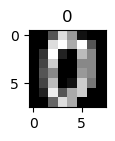

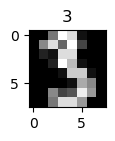

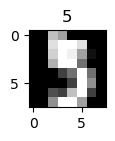

In [210]:
labels = pd.read_hdf(hdfName, 'labels', mode = 'r+')
labels
for i in (0,3,5):
    plt.figure(figsize=(1,1))
    plt.imshow(images.loc[i].to_numpy(), cmap='gray')
    plt.title(labels[i])
    

(1797, 8, 8)
(1797, 64)
[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


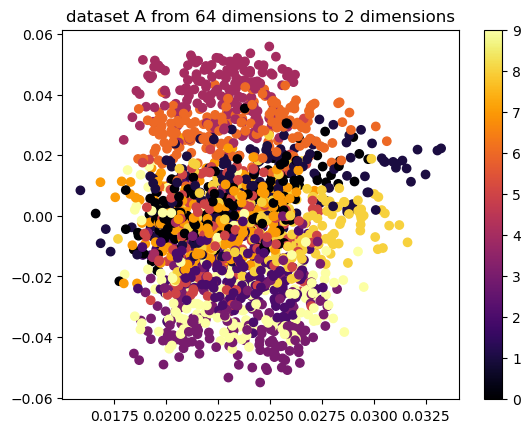

In [211]:
image_data = images.to_numpy().reshape(14376//8, 8, 8)
print(image_data.shape)
new_images = image_data.reshape(14376//8, 64)
print(new_images.shape)

#normalize my dataset
normalized_data = (new_images) / (new_images.max() - new_images.min())
print(normalized_data)

U, S, Vt = np.linalg.svd(new_images, full_matrices=False)
U_2d = U[:, :2]
plt.scatter(U_2d[:, 0], U_2d[:, 1], c=labels, cmap='inferno')
plt.colorbar()
plt.title("dataset A from 64 dimensions to 2 dimensions")
plt.show()